In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import requests
from functools import reduce

# Data retrieval from API

In [14]:
response = requests.get("http://localhost:8080/api/images/")

In [15]:
print(response.json())

[{'_id': '61a65b9069add03e09e1e7df', 'type': 0, 'evaluations_list': [{'evaluation': 2}, {'evaluation': 1}, {'evaluation': 5}, {'evaluation': 2}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 6}, {'evaluation': 1}, {'evaluation': 2}, {'evaluation': 3}, {'evaluation': 5}, {'evaluation': 5}, {'evaluation': 6}, {'evaluation': 2}, {'evaluation': 1}, {'evaluation': 1}, {'evaluation': 2}, {'evaluation': 7}, {'evaluation': 3}, {'evaluation': 7}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 7}]}, {'_id': '61a65f2e69add03e09e1e7e1', 'type': 1, 'evaluations_list': [{'evaluation': 3}, {'evaluation': 5}, {'evaluation': 3}, {'evaluation': 2}, {'evaluation': 5}, {'evaluation': 2}, {'evaluation': 7}, {'evaluation': 7}, {'evaluation': 2}, {'evaluation': 2}, {'evaluation': 6}, {'evaluation': 3}, {'evaluation': 5}, {'evaluation': 6}, {'evaluation': 1}, {'evaluation': 7}, {'evaluation': 2}, {'evaluation': 6}, {'evaluation': 2}, {'evaluation': 1}, {'eval

In [16]:
# transform data retrieved in pandas dataframe
dataframe = pd.json_normalize(response.json(), ['evaluations_list'],  meta=[
    '_id',
    'type',
])
dataframe.info()
dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   evaluation  1530 non-null   int64 
 1   _id         1530 non-null   object
 2   type        1530 non-null   object
dtypes: int64(1), object(2)
memory usage: 36.0+ KB


,evaluation,_id,type
0,2,61a65b9069add03e09e1e7df,0
1,1,61a65b9069add03e09e1e7df,0
2,5,61a65b9069add03e09e1e7df,0
3,2,61a65b9069add03e09e1e7df,0
4,3,61a65b9069add03e09e1e7df,0
...,...,...,...
1525,6,61a8a03fa99916d2901b784b,1
1526,5,61a8a03fa99916d2901b784b,1
1527,7,61a8a03fa99916d2901b784b,1
1528,2,61a8a03fa99916d2901b784b,1


# Distribution of votes

In [17]:
real = dataframe.loc[dataframe['type'] == 0].groupby(['evaluation']).size().reset_index(name='counts_real')
fake = dataframe.loc[dataframe['type'] == 1].groupby(['evaluation']).size().reset_index(name='counts_gen')
print(real)
print(fake)

   evaluation  counts_real
0           1          125
1           2          191
2           3          110
3           4           42
4           5           93
5           6          106
6           7           98
   evaluation  counts_gen
0           1          76
1           2         129
2           3          90
3           4          47
4           5         119
5           6         155
6           7         149


In [18]:
evaluations = reduce(lambda left,right: pd.merge(left,right,on='evaluation',  how='outer'), [real, fake])
evaluations = evaluations.fillna(0)
evaluations['counts_gen'] = evaluations['counts_gen'].astype('int')
evaluations

,evaluation,counts_real,counts_gen
0,1,125,76
1,2,191,129
2,3,110,90
3,4,42,47
4,5,93,119
5,6,106,155
6,7,98,149


In [19]:
totGen = evaluations['counts_gen'].sum()
totReal = evaluations['counts_real'].sum()
print(totGen)
print(totReal)
evaluations['counts_gen'] = evaluations['counts_gen'].div(totGen).mul(100)
evaluations['counts_real'] = evaluations['counts_real'].div(totReal).mul(100)
#evaluations

765
765


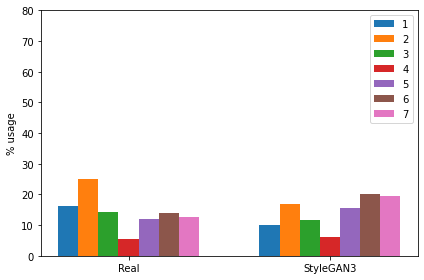

In [20]:
eval_1 = evaluations.loc[evaluations['evaluation'] == 1][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_2 = evaluations.loc[evaluations['evaluation'] == 2][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_3 = evaluations.loc[evaluations['evaluation'] == 3][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_4 = evaluations.loc[evaluations['evaluation'] == 4][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_5 = evaluations.loc[evaluations['evaluation'] == 5][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_6 = evaluations.loc[evaluations['evaluation'] == 6][['counts_real', 'counts_gen']].values.flatten().tolist()
eval_7 = evaluations.loc[evaluations['evaluation'] == 7][['counts_real', 'counts_gen']].values.flatten().tolist()

labels = ('Real', 'StyleGAN3')
x = np.arange(len(labels))  # the label locations
width = 0.1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x-0.3, eval_1, width, label='1')
rects2 = ax.bar(x-0.2, eval_2, width, label='2')
rects3 = ax.bar(x-0.1, eval_3, width, label='3')
rects4 = ax.bar(x, eval_4, width, label='4')
rects5 = ax.bar(x+0.1, eval_5, width, label='5')
rects6 = ax.bar(x+0.2, eval_6, width, label='6')
rects7 = ax.bar(x+0.3, eval_7, width, label='7')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% usage')
ax.set_title('')
ax.legend()
plt.ylim(0,80)
plt.xticks(x, ['Real', 'StyleGAN3'])


fig.tight_layout()


# Realism rate calculation

In [21]:
realismReal = dataframe.loc[(dataframe['type'] == 0) & (dataframe['evaluation'] <= 3)].count()
totalReal = dataframe.loc[dataframe['type'] == 0].count()
realismReal = realismReal['_id']
print(realismReal)
totalReal = totalReal['_id']
print(totalReal)
realismRealPerc = (realismReal/totalReal)*100
realismRealPerc

426
765


55.68627450980392

In [22]:
realismGen = dataframe.loc[(dataframe['type'] == 1) & (dataframe['evaluation'] <= 3)].count()
totalGen = dataframe.loc[dataframe['type'] == 1].count()
realismGen = realismGen['_id']
print(realismGen)
totalGen = totalGen['_id']
print(totalGen)
realismGenPerc = (realismGen/totalGen)*100
realismGenPerc

295
765


38.56209150326798

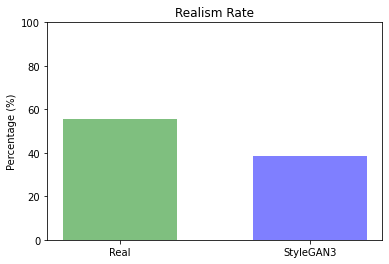

In [32]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [realismRealPerc, realismGenPerc]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.title('Realism Rate')

plt.show()

# Accuracy

In [24]:
numEvalImages = dataframe.groupby(['_id','type']).size().reset_index(name='numEval')
print(numEvalImages)
numCorrectEvalReal = dataframe.loc[(dataframe['type'] == 0) & (dataframe['evaluation'] <= 3)].groupby(['_id']).size().reset_index(name='numCorrect')
print(numCorrectEvalReal)
numCorrectEvalGen = dataframe.loc[(dataframe['type'] == 1) & (dataframe['evaluation'] >= 5)].groupby(['_id']).size().reset_index(name='numCorrect')
print(numCorrectEvalGen)

                         _id  type  numEval
0   61a65b9069add03e09e1e7df     0       25
1   61a65f2e69add03e09e1e7e1     1       25
2   61a65f3669add03e09e1e7e2     1       25
3   61a899b5a99916d2901b7813     0       25
4   61a899c7a99916d2901b7814     0       25
5   61a899daa99916d2901b7815     0       25
6   61a899eba99916d2901b7816     0       25
7   61a899ffa99916d2901b7817     0       25
8   61a89a1aa99916d2901b7818     0       25
9   61a89a29a99916d2901b7819     0       25
10  61a89a39a99916d2901b781a     0       25
11  61a89a69a99916d2901b781b     0       25
12  61a89a76a99916d2901b781c     0       26
13  61a89a84a99916d2901b781d     0       26
14  61a89a8fa99916d2901b781e     0       26
15  61a89a9da99916d2901b781f     0       26
16  61a89aa7a99916d2901b7820     0       26
17  61a89bbfa99916d2901b7821     0       25
18  61a89bc9a99916d2901b7822     0       25
19  61a89bd7a99916d2901b7823     0       25
20  61a89be3a99916d2901b7824     0       25
21  61a89bf9a99916d2901b7825    

In [25]:
correct = pd.concat([numCorrectEvalReal, numCorrectEvalGen])
#correct
acc = reduce(lambda left,right: pd.merge(left,right,on='_id',  how='outer'), [numEvalImages, correct])
acc = acc.fillna(0)
acc['numCorrect'] = acc['numCorrect'].astype('int')
acc

,_id,type,numEval,numCorrect
0,61a65b9069add03e09e1e7df,0,25,17
1,61a65f2e69add03e09e1e7e1,1,25,12
2,61a65f3669add03e09e1e7e2,1,25,10
3,61a899b5a99916d2901b7813,0,25,15
4,61a899c7a99916d2901b7814,0,25,21
5,61a899daa99916d2901b7815,0,25,13
6,61a899eba99916d2901b7816,0,25,9
7,61a899ffa99916d2901b7817,0,25,13
8,61a89a1aa99916d2901b7818,0,25,3
9,61a89a29a99916d2901b7819,0,25,17


In [26]:
acc['acc'] = acc['numCorrect'].div(acc['numEval'])
print(acc)
meanAccReal = acc.loc[dataframe['type'] == 0][['acc']].mean().mul(100)
meanAccReal = meanAccReal['acc']
print(meanAccReal)
meanAccGen = acc.loc[dataframe['type'] == 1][['acc']].mean().mul(100)
meanAccGen = meanAccGen['acc']
print(meanAccGen)


                         _id  type  numEval  numCorrect       acc
0   61a65b9069add03e09e1e7df     0       25          17  0.680000
1   61a65f2e69add03e09e1e7e1     1       25          12  0.480000
2   61a65f3669add03e09e1e7e2     1       25          10  0.400000
3   61a899b5a99916d2901b7813     0       25          15  0.600000
4   61a899c7a99916d2901b7814     0       25          21  0.840000
5   61a899daa99916d2901b7815     0       25          13  0.520000
6   61a899eba99916d2901b7816     0       25           9  0.360000
7   61a899ffa99916d2901b7817     0       25          13  0.520000
8   61a89a1aa99916d2901b7818     0       25           3  0.120000
9   61a89a29a99916d2901b7819     0       25          17  0.680000
10  61a89a39a99916d2901b781a     0       25          18  0.720000
11  61a89a69a99916d2901b781b     0       25          17  0.680000
12  61a89a76a99916d2901b781c     0       26          23  0.884615
13  61a89a84a99916d2901b781d     0       26          15  0.576923
14  61a89a

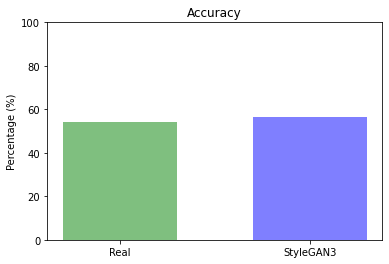

In [33]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [meanAccReal, meanAccGen]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.title('Accuracy')

plt.show()

# Confidence

In [28]:
mappedDF = dataframe.copy()
mappedDF['evaluation'] = mappedDF['evaluation'].map({1:1, 2:2/3, 3:1/3, 4:0, 5:1/3, 6:2/3, 7:1})
mappedDF

,evaluation,_id,type
0,0.666667,61a65b9069add03e09e1e7df,0
1,1.000000,61a65b9069add03e09e1e7df,0
2,0.333333,61a65b9069add03e09e1e7df,0
3,0.666667,61a65b9069add03e09e1e7df,0
4,0.333333,61a65b9069add03e09e1e7df,0
...,...,...,...
1525,0.666667,61a8a03fa99916d2901b784b,1
1526,0.333333,61a8a03fa99916d2901b784b,1
1527,1.000000,61a8a03fa99916d2901b784b,1
1528,0.666667,61a8a03fa99916d2901b784b,1


In [29]:
meanConfRealImages = mappedDF.loc[mappedDF['type'] == 0].groupby(['_id']).mean()
print(meanConfRealImages)
meanConfGenImages = mappedDF.loc[mappedDF['type'] == 1].groupby(['_id']).mean()
print(meanConfGenImages)

                          evaluation
_id                                 
61a65b9069add03e09e1e7df    0.653333
61a899b5a99916d2901b7813    0.520000
61a899c7a99916d2901b7814    0.680000
61a899daa99916d2901b7815    0.546667
61a899eba99916d2901b7816    0.586667
61a899ffa99916d2901b7817    0.573333
61a89a1aa99916d2901b7818    0.640000
61a89a29a99916d2901b7819    0.600000
61a89a39a99916d2901b781a    0.613333
61a89a69a99916d2901b781b    0.586667
61a89a76a99916d2901b781c    0.743590
61a89a84a99916d2901b781d    0.679487
61a89a8fa99916d2901b781e    0.641026
61a89a9da99916d2901b781f    0.717949
61a89aa7a99916d2901b7820    0.564103
61a89bbfa99916d2901b7821    0.666667
61a89bc9a99916d2901b7822    0.680000
61a89bd7a99916d2901b7823    0.573333
61a89be3a99916d2901b7824    0.680000
61a89bf9a99916d2901b7825    0.653333
61a89c05a99916d2901b7826    0.666667
61a89c12a99916d2901b7827    0.628205
61a89c1da99916d2901b7828    0.653846
61a89c2ca99916d2901b7829    0.628205
61a89c3fa99916d2901b782a    0.666667
6

In [30]:
meanConfReal = meanConfRealImages[['evaluation']].mean().mul(100)
meanConfGen = meanConfGenImages[['evaluation']].mean().mul(100)
meanConfReal = meanConfReal['evaluation']
meanConfGen = meanConfGen['evaluation']
print(meanConfReal)
print(meanConfGen)

63.83589743589744
63.23247863247864


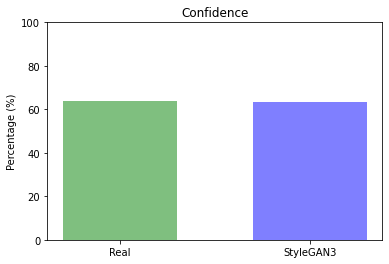

In [34]:
objects = ('Real', 'StyleGAN3')
y_pos = np.arange(len(objects))
data = [meanConfReal, meanConfGen]

plt.bar(y_pos, data, align='center', alpha=0.5, width=0.6, color=['green', 'blue'])
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)
plt.title('Confidence')

plt.show()